In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('../data/Healthcare-Diabetes.csv')

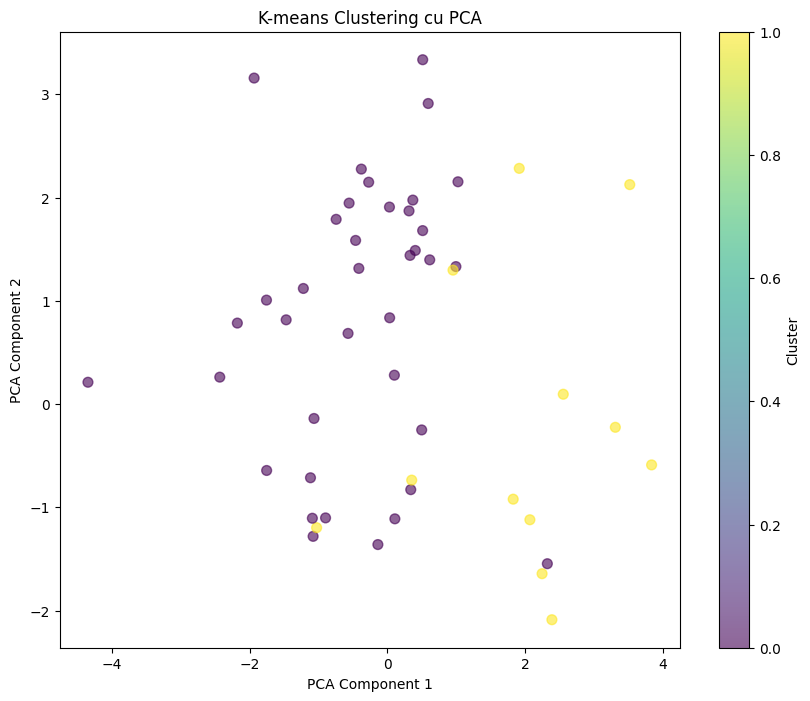

In [22]:
x = np.array([el[1:-1] for el in data.values])
kmeans = KMeans(n_clusters=2, random_state=42)
clusters=kmeans.fit_predict(x)

scaler=StandardScaler()
x=scaler.fit_transform(x)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)



plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:50, 0], x_pca[:50, 1], c=clusters[:50], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-means Clustering cu PCA")
plt.show()

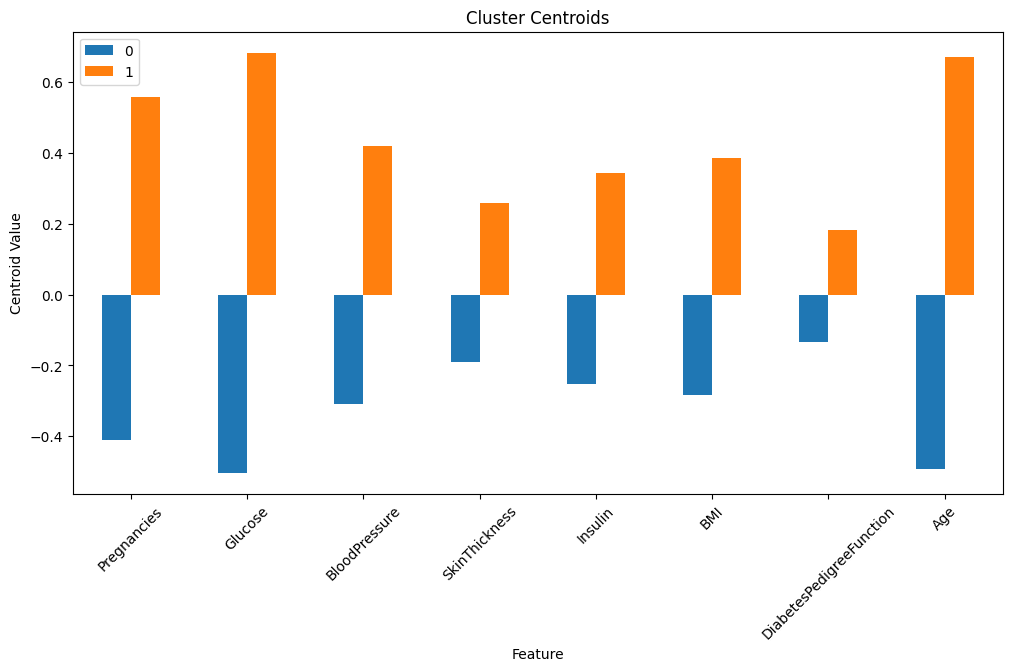

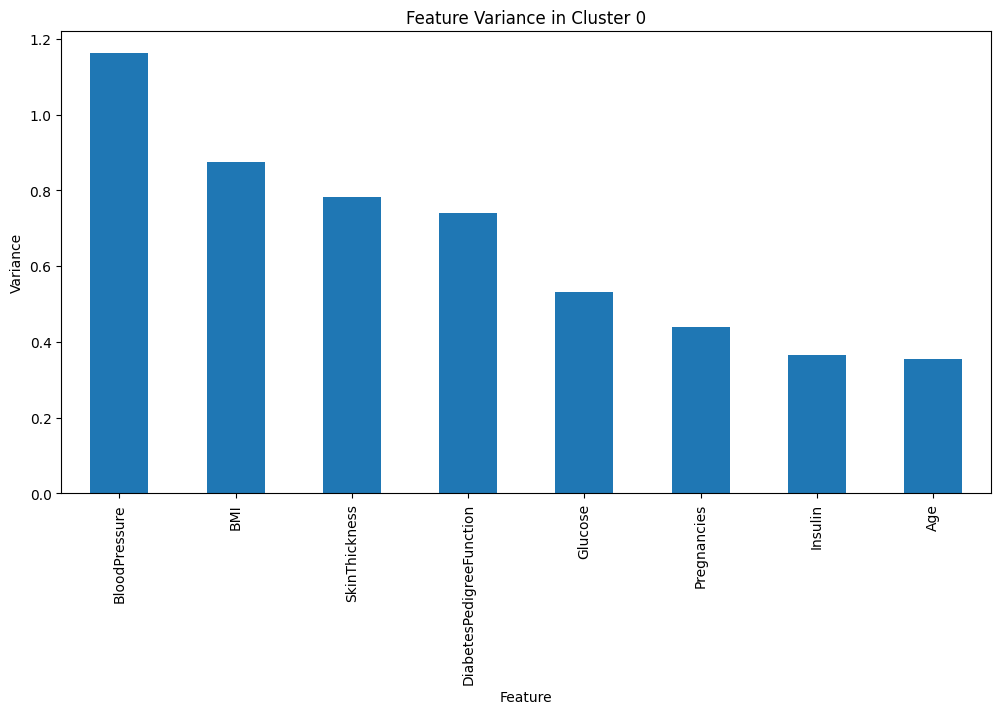

In [25]:
from sklearn.cluster import KMeans
import numpy as np


n_clusters = 2  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(x)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns[1:-1])  
centroids.T.plot(kind='bar', figsize=(12, 6), title='Cluster Centroids')
plt.ylabel('Centroid Value')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.show()

variances = np.var(x[kmeans.labels_ == 0], axis=0) 
pd.Series(variances, index=data.columns[1:-1]).sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title='Feature Variance in Cluster 0')
plt.ylabel('Variance')
plt.xlabel('Feature')
plt.show()
